# Praca domowa 6

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie zbioru

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
X = olivetti.data

In [5]:
X.shape

(400, 4096)

Jest więc 400 obrazków o wymiarze 64 px x 64 px, co daje 4096 pikseli - czyli drugi wymiar.

## Rysowanie twarzy

In [6]:
def show_face(x):
    plt.imshow(x.reshape((64, 64)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

In [7]:
def show_image(X, i):
    show_face(X[i])

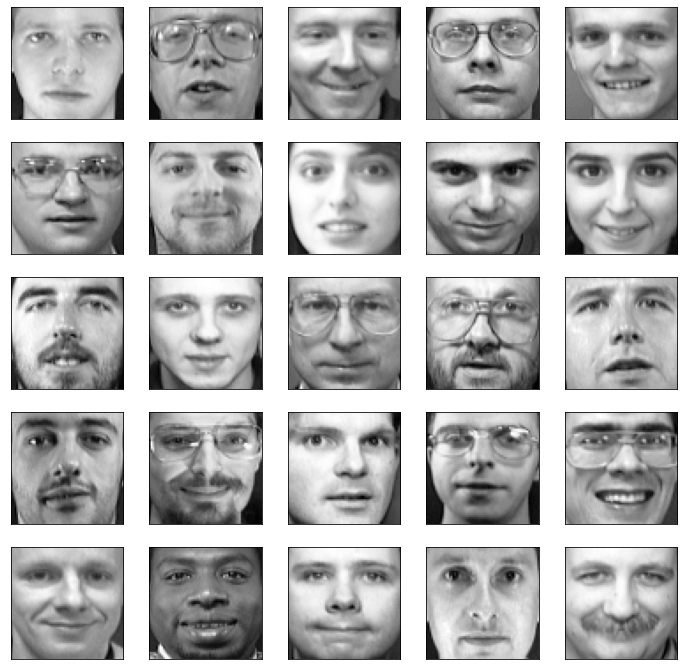

In [8]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(X, 10 * i)

## PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

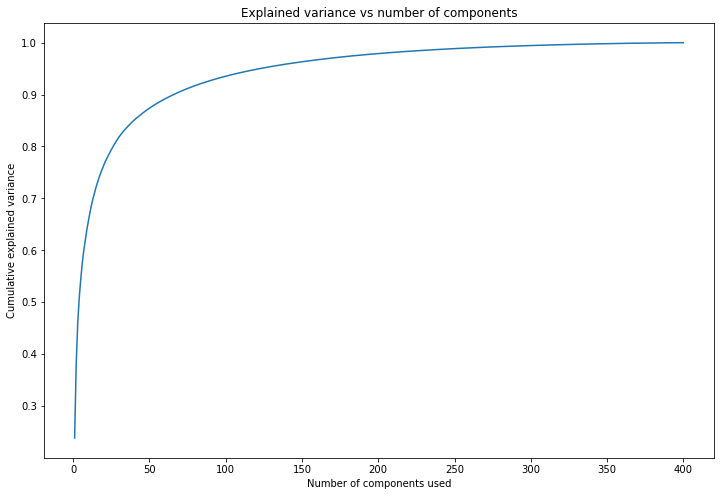

In [10]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components used')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()

Przyjmijmy, że po zredukowaniu wymiarów chcemy mieć wyjaśnione 90% wariancji. Jak widać na wykresie wyżej, taki stosunek wyjaśnia niewiele ponad 50 zmiennych.

In [11]:
pca1 = PCA(n_components = 0.9)
pca1.fit(X)
print(f"Explained variance ratio: {sum(pca1.explained_variance_ratio_)}")
print(f"Number of components: {len(pca1.explained_variance_ratio_)}")

Explained variance ratio: 0.9002451807027683
Number of components: 66


In [12]:
X_compressed = pca1.fit_transform(X)

In [13]:
print(f"Stopień kompresji wynosi: {X[0].shape[0] / X_compressed[0].shape[0]}")

Stopień kompresji wynosi: 62.06060606060606


## Transormacja odwrotna

In [14]:
X_compressed_inverse = pca1.inverse_transform(X_compressed)

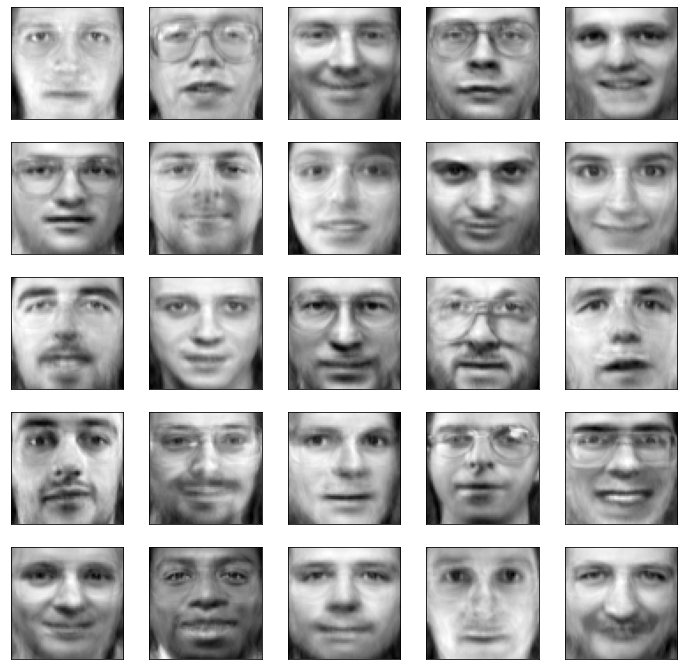

In [15]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(X_compressed_inverse, 10 * i)

Jak widać, zdjęcia są podobne do oryginalnych, jednak są gorszej jakości.

### Błąd RMSE

In [16]:
from sklearn.metrics import mean_squared_error as mse

In [17]:
results1 = []
for i in range(X.shape[0]):
    results1.append(mse(X[i], X_compressed_inverse[i], squared = False))

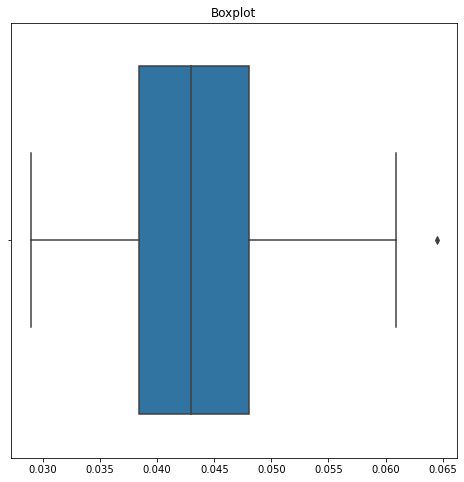

In [18]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = results1)
plt.title("Boxplot")
plt.show()

In [19]:
print(f"Średnie RMSE:                {np.mean(results1)}")
print(f"Odchylenie standardowe RMSE: {np.std(results1)}")

Średnie RMSE:                0.043339718133211136
Odchylenie standardowe RMSE: 0.006611234974116087


Wartość obliczonego błędu jest niewielka.

## Przekształcenia obrazów

Obrót o 90 stopni

In [20]:
from skimage import transform

rotate90 = []
    
for i in range(X.shape[0]):
    rotate90.append(transform.rotate(X[i].reshape(64, 64), 90).reshape(1, 4096))

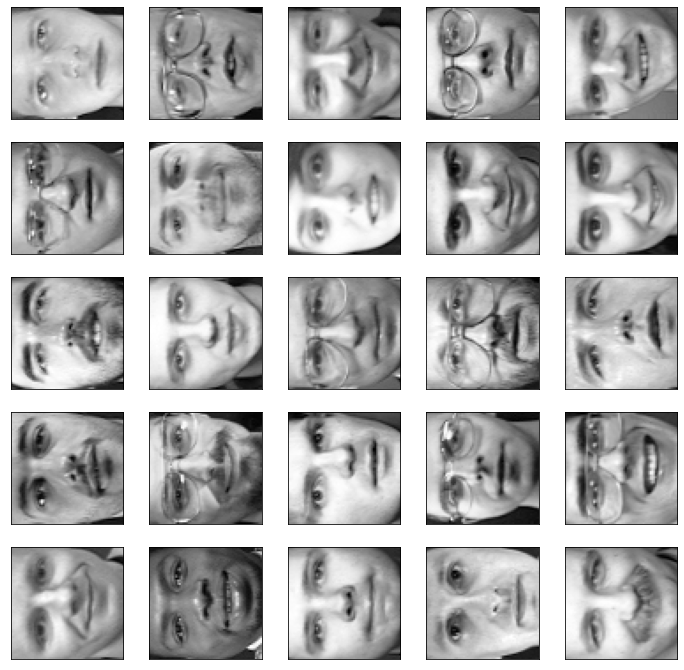

In [21]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(rotate90, 10 * i)

Obrót o 180 stopni

In [22]:
rotate180 = []
    
for i in range(X.shape[0]):
    rotate180.append(transform.rotate(X[i].reshape(64, 64), 180).reshape(1, 4096))

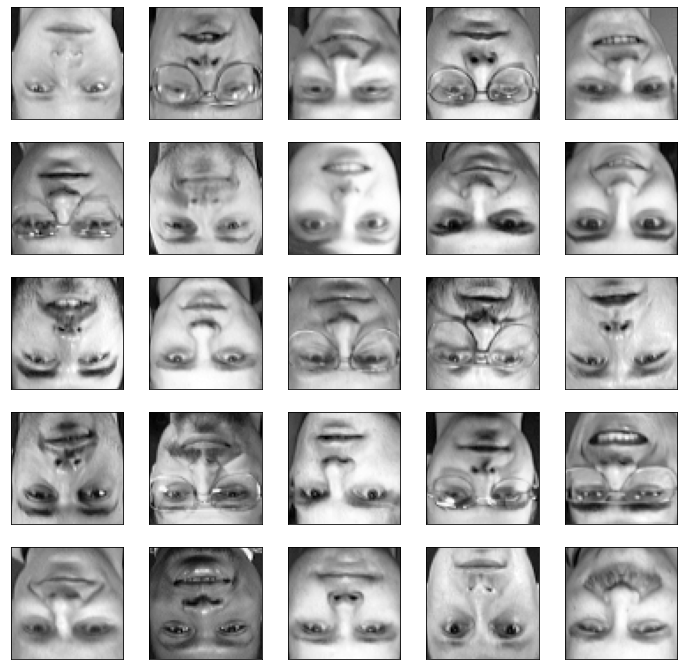

In [23]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(rotate180, 10 * i)

Swirling

In [24]:
swirling = []
    
for i in range(X.shape[0]):
    swirling.append(transform.swirl(X[i].reshape(64, 64), strength = 2).reshape(1, 4096))

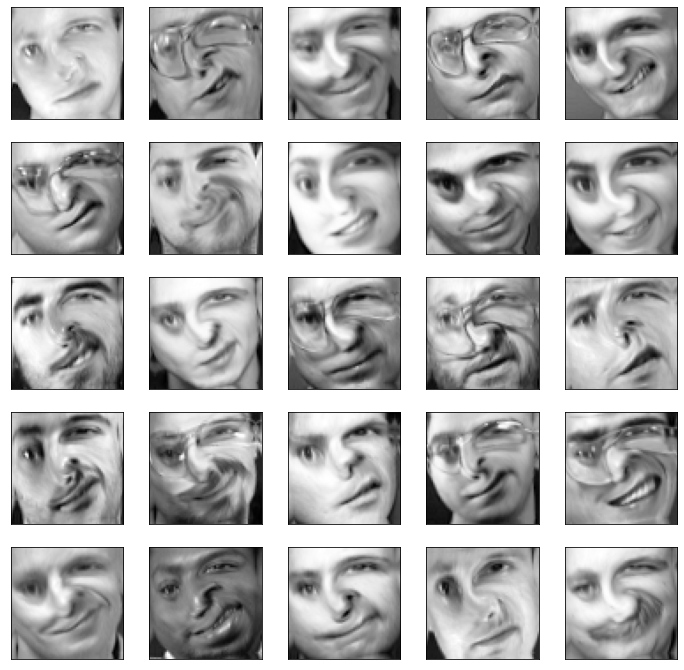

In [25]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(swirling, 10 * i)

Invert colours

In [26]:
from skimage.util import invert

inverted_colours = []
    
for i in range(X.shape[0]):
    inverted_colours.append(invert(X[i].reshape(64, 64)).reshape(1, 4096))

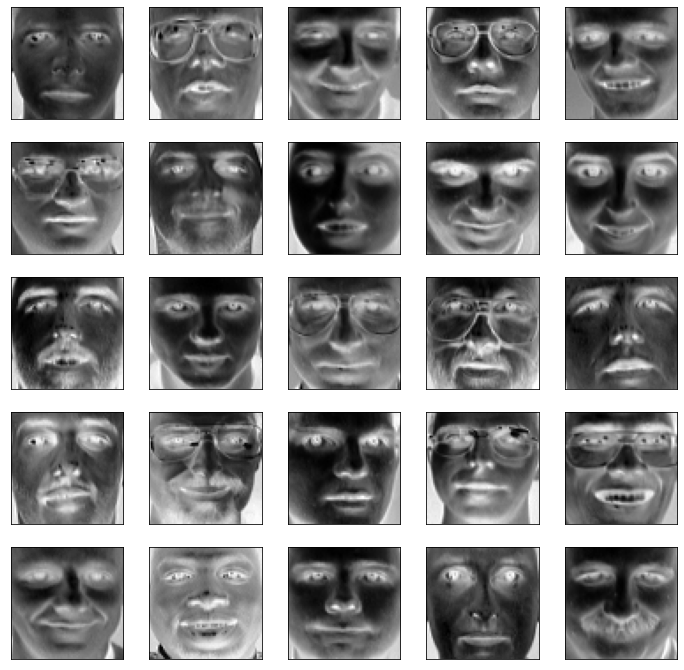

In [27]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(inverted_colours, 10 * i)

Random noise

In [28]:
from skimage.util import random_noise

noise = []
    
for i in range(X.shape[0]):
    noise.append(random_noise(X[i].reshape(64, 64)).reshape(1, 4096))

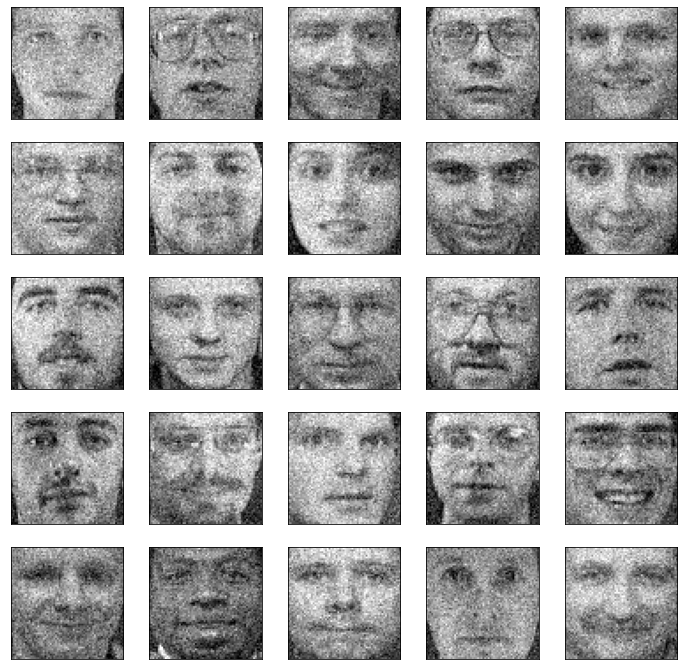

In [29]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(noise, 10 * i)

Adjust gamma

In [30]:
from skimage.exposure import adjust_gamma

gamma_low = []
    
for i in range(X.shape[0]):
    gamma_low.append(adjust_gamma(X[i].reshape(64, 64), gamma = 0.01).reshape(1, 4096))

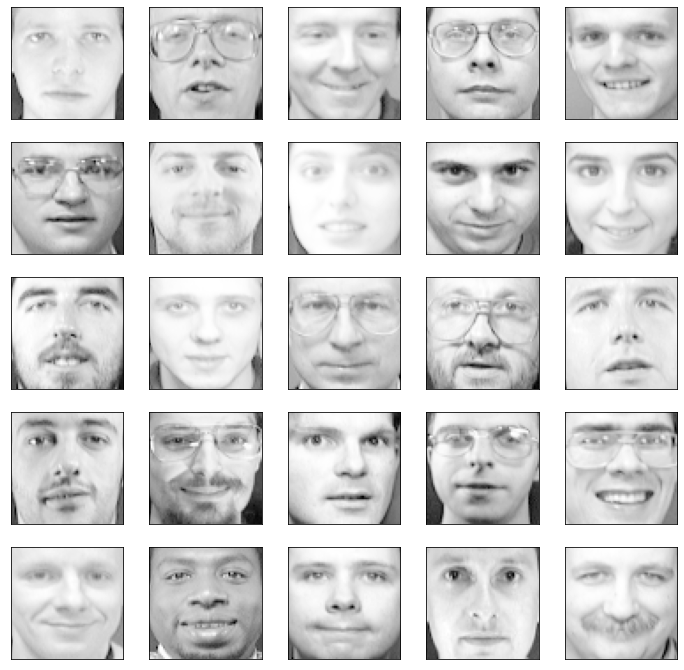

In [31]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(gamma_low, 10 * i)

In [32]:
gamma_high = []
    
for i in range(X.shape[0]):
    gamma_high.append(adjust_gamma(X[i].reshape(64, 64), gamma = 8).reshape(1, 4096))

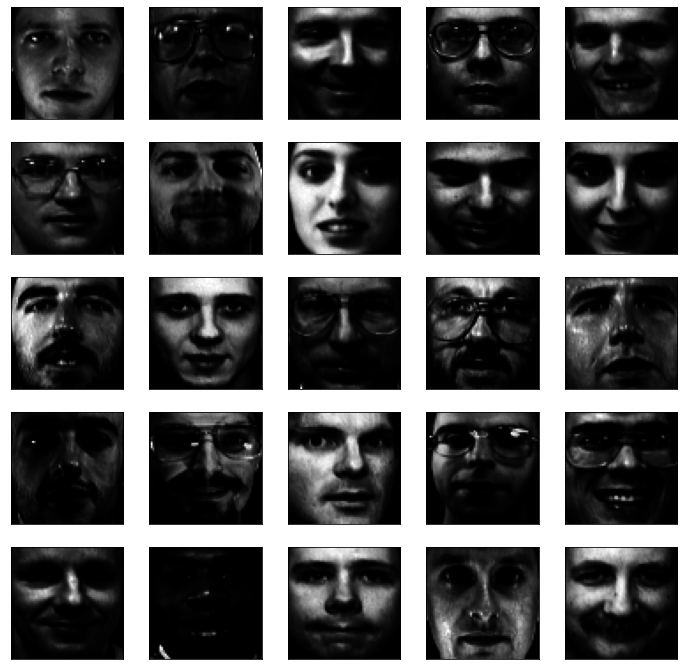

In [33]:
plt.figure(figsize = (12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    show_image(gamma_high, 10 * i)

## Transformacja przetworzonych obrazów i błędy rekonstrukcji

In [34]:
transformed = [rotate90, rotate180, swirling, inverted_colours, noise, gamma_low, gamma_high]
rmse_results = []

In [35]:
for i in range(len(transformed)):
    transformed[i] = np.array(transformed[i])[:, 0, :]

In [36]:
for tab in transformed:
    compressed_inverse = pca1.inverse_transform(pca1.fit_transform(tab))
    r = []
    for i in range(compressed_inverse.shape[0]):
        r.append(mse(X[i], compressed_inverse[i], squared = False))
    rmse_results.append(r)

In [37]:
q = pd.DataFrame(np.array(rmse_results).T)
q.columns = ['rotate90', 'rotate180', 'swirling', 'inverted_colours', 'noise', 'gamma_low', 'gamma_high']

In [38]:
q['no_transformation'] = results1

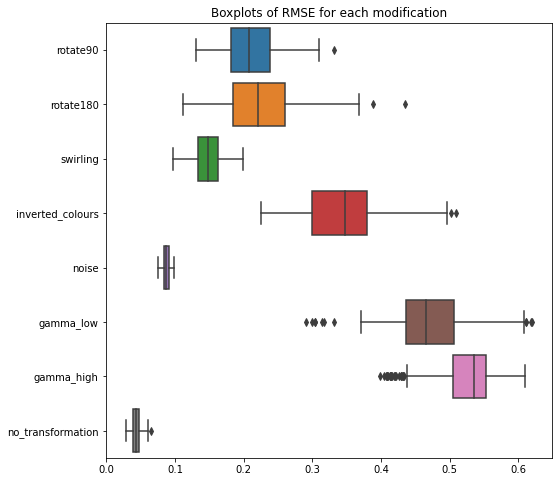

In [39]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = q, orient = 'h')
plt.title('Boxplots of RMSE for each modification')
plt.show()

Na podstawie wygenerowanych wyników widać, że RMSE zdjęć po pewnych modyfikacjach było większe niż to, które noe zostało poddane żadnym dodatkowym modyfikacjom. 

Można stąd wnioskować, że PCA można używać do wykrywania większości zastosowanych powyżej anomalii na zdjęciach. 

Wyjątkiem jest tylko szum, który ma dość mały odstęp międzykwartylowy i dość niską medianę. 

Wydaje się to jednak logiczne - szum psuje głównie jakość obrazu, podczas gdy PCA robi coś podobnego. Jeśli więc zastosujemy PCA na zaszumionym obrazie, efekt będzie słabszy i w efekcie błąd RMSE mniejszy.